# <h1><center>Spatial Data Visualization</center></h1>

## 4.2 - Choropleth Map


<img src='https://miro.medium.com/max/2000/1*W645KKy67eQoylGsrY6x9Q.png'></img>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
small_areas = gpd.read_file("data/malmo-pop.shp")
small_areas.head()

,fid,Deso,Age_5,Age6_9,Age10_15,Age16_19,Age20_24,Age25_29,Age30_34,Age35_39,...,Age45_49,Age50_54,Age55_59,Age60_64,Age65_69,Age70_74,Age75_79,Age80_w,Total,geometry
0,2822.0,1280C1590,125.0,82.0,113.0,83.0,80.0,104.0,99.0,109.0,...,99.0,115.0,88.0,93.0,101.0,112.0,141.0,410.0,2057.0,"POLYGON ((373380.287 6160661.365, 373382.480 6..."
1,2823.0,1280C1430,332.0,201.0,262.0,141.0,165.0,217.0,212.0,195.0,...,140.0,139.0,140.0,101.0,75.0,54.0,39.0,35.0,2616.0,"POLYGON ((372667.079 6159991.971, 372653.152 6..."
2,2824.0,1280C1220,128.0,69.0,65.0,34.0,93.0,132.0,135.0,109.0,...,71.0,91.0,91.0,119.0,153.0,110.0,92.0,122.0,1696.0,"POLYGON ((372812.733 6158498.565, 372817.194 6..."
3,2825.0,1280C1490,76.0,70.0,118.0,92.0,102.0,57.0,48.0,89.0,...,108.0,101.0,94.0,80.0,59.0,62.0,35.0,62.0,1340.0,"POLYGON ((374168.622 6160181.233, 374169.100 6..."
4,2826.0,1280C1530,220.0,94.0,118.0,74.0,150.0,200.0,196.0,163.0,...,113.0,81.0,107.0,92.0,77.0,45.0,31.0,32.0,1928.0,"POLYGON ((375219.802 6160462.505, 375274.357 6..."


In [3]:
small_areas.columns

Index(['fid', 'Deso', 'Age_5', 'Age6_9', 'Age10_15', 'Age16_19', 'Age20_24',
       'Age25_29', 'Age30_34', 'Age35_39', 'Age40_44', 'Age45_49', 'Age50_54',
       'Age55_59', 'Age60_64', 'Age65_69', 'Age70_74', 'Age75_79', 'Age80_w',
       'Total', 'geometry'],
      dtype='object')

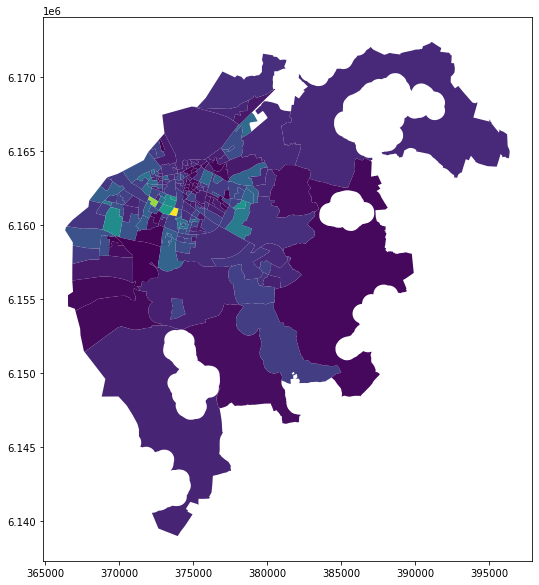

In [4]:
small_areas.plot(column='Age80_w', figsize=(12,10));

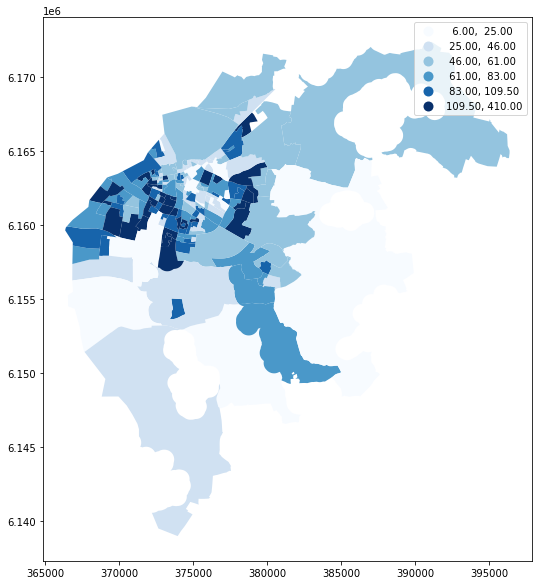

In [5]:
fig, ax = plt.subplots(figsize=(12,10))
small_areas.plot(column='Age80_w', cmap="Blues", scheme="quantiles", k=6, ax=ax, legend=True);

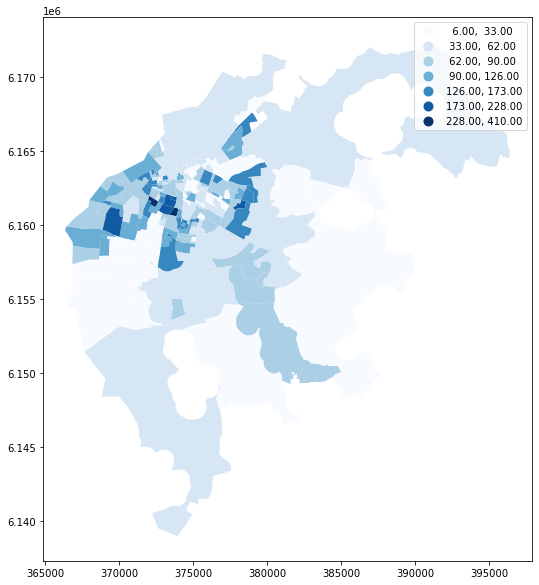

In [6]:
fig, ax = plt.subplots(figsize=(12,10))
small_areas.plot(column='Age80_w', cmap="Blues", scheme='FisherJenks', k=7, ax=ax, legend=True);

* Normalize Population

In [7]:
small_areas["Age80_perc"] = (small_areas['Age80_w'] / small_areas["Total"])*100
small_areas["Age80_perc"]

0      19.931940
1       1.337920
2       7.193396
3       4.626866
4       1.659751
         ...    
197     1.081359
198     6.577225
199     0.809353
200     8.840864
201     2.761104
Name: Age80_perc, Length: 202, dtype: float64

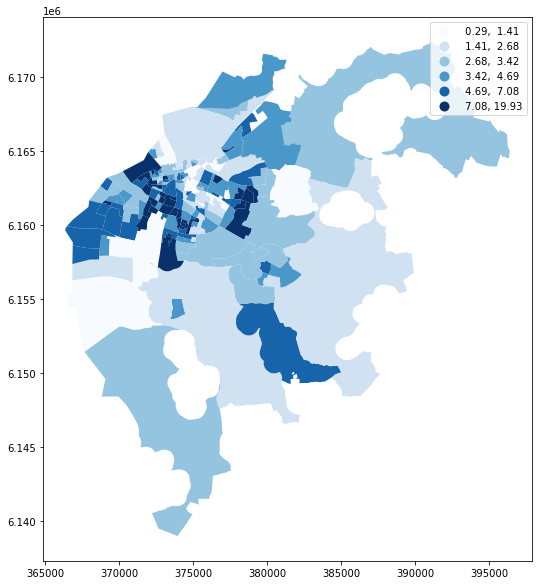

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
small_areas.plot(column='Age80_perc', cmap="Blues", scheme="quantiles", k=6, ax=ax, legend=True);

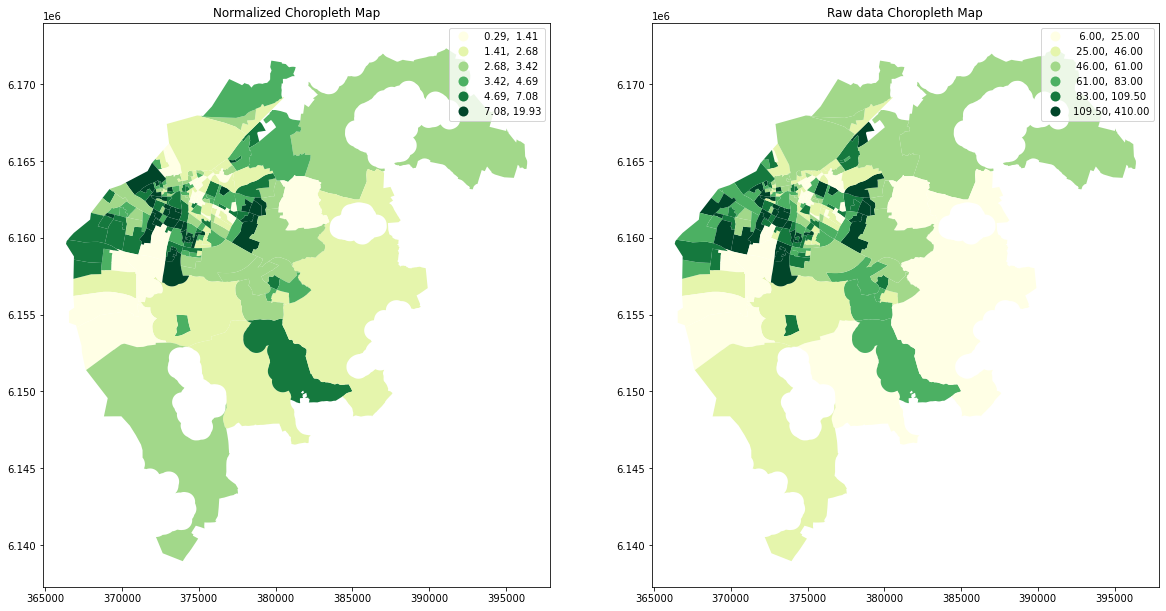

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20,18))
small_areas.plot(column='Age80_perc', cmap="YlGn", scheme="quantiles", k=6, ax=ax[0], legend=True);
ax[0].set_title("Normalized Choropleth Map")
small_areas.plot(column='Age80_w', cmap="YlGn", scheme="quantiles", k=6, ax=ax[1], legend=True);
ax[1].set_title("Raw data Choropleth Map")
plt.show()
